In [25]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from planning.src.map import ProbabilityMap, BuildingMap, BuildingMapGenConfig
from numba import njit
from typing import Tuple, List
from matplotlib import cm
from planning.src.map.util import get_3D_neighbors

In [2]:
# sns.set_style('darkgrid')
%matplotlib inline

In [3]:
def get_big_map():
    np.random.seed(15)
    size = 50
    n_building = 8
    config = BuildingMapGenConfig(size, size, size, n_building, 4, 10)
    bmap = BuildingMap(config)
    return bmap

def get_small_map():
    np.random.seed(5)
    size = 3
    n_building = 1
    config = BuildingMapGenConfig(size, size, size, n_building, 1, 2)
    bmap = BuildingMap(config)
    return bmap


In [4]:
bmap = get_big_map()

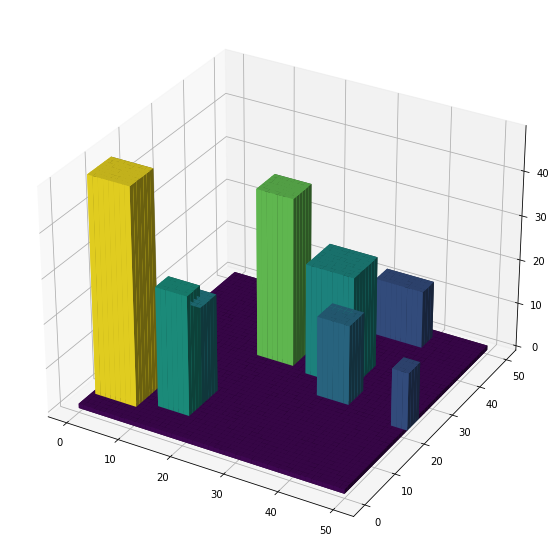

In [5]:
bmap.vis_map()

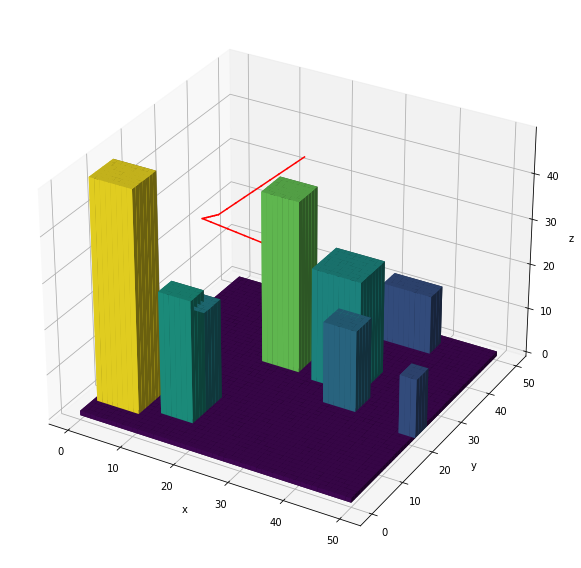

In [24]:
def vis_2d_histogram(bmap: np.ndarray, path_pts: List[Coor]=None, figsize:Tuple[int, int]=(8, 8), title: str=None) -> None:
    f = plt.figure(figsize=figsize)
    ax = plt.axes(projection='3d')
    _x = np.arange(bmap.shape[0])
    _y = np.arange(bmap.shape[1])
    _xx, _yy = np.meshgrid(_x, _y)
    x, y = _xx.ravel(), _yy.ravel()

    top = bmap.map.flatten()
    bottom = np.zeros_like(top)
    width = depth = 1

    cmap = cm.get_cmap()
    bar_plt = ax.bar3d(x, y, bottom, width, depth, top, shade=True, color=cmap(top / np.max(top)))

    # xline, yline, zline = path_pts[:, 0], path_pts[:, 1], path_pts[:, 2]
    # ax1.plot3D(xline, yline, zline, 'red')
    if path_pts is not None:
        edges = np.array([(path_pts[i], path_pts[i+1]) for i in range(len(path_pts)-1)])
        for edge in edges:
            xline, yline, zline = edge[:, 0], edge[:, 1], edge[:, 2]
            ax.plot3D(xline, yline, zline, 'red')
    if title is not None:
        ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.close()
    return f

np.random.seed(10)
src, target = bmap.gen_random_state()

# bmap.free_graph_pos_id_map[src]
# bmap.free_graph_pos_id_map[target]
# path = nx.shortest_path(bmap.free_graph, bmap.free_graph_pos_id_map[src], bmap.free_graph_pos_id_map[target])
# path_pts = np.array([bmap.free_graph_id_pos_map[pt] for pt in path])
# bfs_f = vis_2d_histogram(bmap, path_pts)
# bfs_f
# path = nx.dfs_preorder_nodes(bmap.free_graph, bmap.free_graph_pos_id_map[src], bmap.free_graph_pos_id_map[target])
# path_pts = np.array([bmap.free_graph_id_pos_map[pt] for pt in path])
# dfs_f = vis_2d_histogram(bmap, path_pts)
path = nx.astar_path(bmap.free_graph, bmap.free_graph_pos_id_map[src], bmap.free_graph_pos_id_map[target])
path_pts = np.array([bmap.free_graph_id_pos_map[pt] for pt in path])
astar_f = vis_2d_histogram(bmap, path_pts)
astar_f


In [38]:

# @njit
def get_3D_neighbors(pt: Tuple, shape: np.array) -> np.ndarray:
    n_row, n_col, n_height = shape
    coor = []
    row, col, height = pt
    if row > 0: # front
        coor.append((row - 1, col, height))
    if row < n_row - 1: # back
        coor.append((row + 1, col, height))
    if col > 0: # left
        coor.append((row, col - 1, height))
    if col < n_col - 1: # right
        coor.append((row, col + 1, height))
    if height > 0: # down
        coor.append((row, col, height - 1))
    if height < n_height - 1: # up
        coor.append((row, col, height + 1))
    return coor


# solave bfs
def solve_bfs(map: np.ndarray, src: Tuple, target: Tuple):
    queue = [src]
    visited = set()
    while len(queue) > 0:
        pt = queue.pop(0)
        if pt in visited:
            continue
        visited.add(pt)
        if (np.array(pt) == np.array(target)).all():
            return True
        for neighbor in get_3D_neighbors(map, pt):
            queue.append(neighbor)
    return False

solve_bfs(bmap.map, src, target)


[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


ValueError: too many values to unpack (expected 3)

In [32]:
a = np.array([1, 2, 3])
visited = set()
visited.add(a)

TypeError: unhashable type: 'numpy.ndarray'

In [48]:
def get_3D_neighbors(pt):
    for i in range(-1, 2):
        for j in range(-1, 2):
            for k in range(-1, 2):
                if i == 0 and j == 0 and k == 0:
                    continue
                yield (pt[0] + i, pt[1] + j, pt[2] + k)
list(get_3D_neighbors((0, 0, 0)))

[(-1, -1, -1),
 (-1, -1, 0),
 (-1, -1, 1),
 (-1, 0, -1),
 (-1, 0, 0),
 (-1, 0, 1),
 (-1, 1, -1),
 (-1, 1, 0),
 (-1, 1, 1),
 (0, -1, -1),
 (0, -1, 0),
 (0, -1, 1),
 (0, 0, -1),
 (0, 0, 1),
 (0, 1, -1),
 (0, 1, 0),
 (0, 1, 1),
 (1, -1, -1),
 (1, -1, 0),
 (1, -1, 1),
 (1, 0, -1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, -1),
 (1, 1, 0),
 (1, 1, 1)]

In [50]:
from typing import List, Tuple, Type
t = Type[Tuple[int, int]]

In [41]:
bmap.map > 1

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [46]:
a = (2,5,5)
b = (9, 2, 5)
np.linalg.norm(np.array(a) - np.array(b))

7.615773105863909

In [12]:
# nx.shortest_path(bmap.free_graph, src, target)
# bmap.obstacle_graph.get
nodes = bmap.free_graph.nodes
n1 = random.choice(nodes)
n2 = random.choice(nodes)
# list(nodes)[:4]
# for n in nodes:
#     print(type(n))
#     break
bmap.free_graph.has_node(n1)
# nx.shortest_path(bmap.free_graph, n1, n2)

False

In [13]:
G = nx.path_graph(5)
print(nx.shortest_path(G, source=0, target=4))

p = nx.shortest_path(G, source=0)  # target not specified
# p[3] # shortest path from source=0 to target=3

p = nx.shortest_path(G, target=4)  # source not specified
# p[1] # shortest path from source=1 to target=4

p = nx.shortest_path(G)  # source, target not specified

[0, 1, 2, 3, 4]


In [16]:
G.nodes

NodeView((0, 1, 2, 3, 4))

In [24]:
edge_xyz.shape

(20, 2, 3)

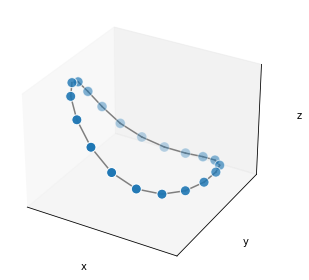

In [22]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# The graph to visualize
G = nx.cycle_graph(20)

# 3d spring layout
pos = nx.spring_layout(G, dim=3, seed=779)
# Extract node and edge positions from the layout
node_xyz = np.array([pos[v] for v in sorted(G)])
edge_xyz = np.array([(pos[u], pos[v]) for u, v in G.edges()])

# Create the 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot the nodes - alpha is scaled by "depth" automatically
ax.scatter(*node_xyz.T, s=100, ec="w")

# Plot the edges
for vizedge in edge_xyz:
    ax.plot(*vizedge.T, color="tab:gray")


def _format_axes(ax):
    """Visualization options for the 3D axes."""
    # Turn gridlines off
    ax.grid(False)
    # Suppress tick labels
    for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
        dim.set_ticks([])
    # Set axes labels
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")


_format_axes(ax)
fig.tight_layout()
plt.show()

In [51]:
import plotly.graph_objects as go
import numpy as np
np.random.seed(1)

N = 70

fig = go.Figure(data=[go.Mesh3d(x=(70*np.random.randn(N)),
                   y=(55*np.random.randn(N)),
                   z=(40*np.random.randn(N)),
                   opacity=0.5,
                   color='rgba(244,22,100,0.6)'
                  )])

fig.update_layout(
    scene = dict(
        xaxis = dict(nticks=4, range=[-100,100],),
                     yaxis = dict(nticks=4, range=[-50,100],),
                     zaxis = dict(nticks=4, range=[-100,100],),),
    width=700,
    margin=dict(r=20, l=10, b=10, t=10))

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [54]:
data = np.array([[1,2,3], [4,5,6]])
data[:, 0]

array([1, 4])

In [10]:
# @njit
def build_graph(map):
    # build a 3D graph
    G = nx.Graph()
    for i in range(map.shape[0]):
        for j in range(map.shape[1]):
            for k in range(map.shape[2]):
                if map[i, j, k] == 0:
                    G.add_node((i, j, k))
    for i in range(map.shape[0]):
        for j in range(map.shape[1]):
            for k in range(map.shape[2]):
                if map[i, j, k] == 0:
                    for di in range(-1, 2):
                        for dj in range(-1, 2):
                            for dk in range(-1, 2):
                                if (i + di, j + dj, k + dk) in G.nodes:
                                    G.add_edge((i, j, k), (i + di, j + dj, k + dk))
    return G

m = np.random.randn(100, 100, 100)
m[m < 0.3] = 0
m[m > 0.3] = 1
graph = build_graph(m)

Exception ignored in: <function BaseContext._insert_global.<locals>.on_disposal at 0x10f2bb2e0>
Traceback (most recent call last):
  File "/Users/huakun/opt/anaconda3/envs/AI/lib/python3.10/site-packages/numba/core/typing/context.py", line 474, in on_disposal
    def on_disposal(wr, pop=self._globals.pop):
KeyboardInterrupt: 


In [ ]:
# build a 3D BFS
@njit
def bfs_3d(start, goal, map):
    # build a 3D graph
    G = nx.Graph()
    for i in range(map.shape[0]):
        for j in range(map.shape[1]):
            for k in range(map.shape[2]):
                if map[i, j, k] == 0:
                    G.add_node((i, j, k))
    for i in range(map.shape[0]):
        for j in range(map.shape[1]):
            for k in range(map.shape[2]):
                if map[i, j, k] == 0:
                    for di in range(-1, 2):
                        for dj in range(-1, 2):
                            for dk in range(-1, 2):
                                if (i + di, j + dj, k + dk) in G.nodes:
                                    G.add_edge((i, j, k), (i + di, j + dj, k + dk))
    # BFS
    path = nx.shortest_path(G, start, goal)
    return np.array(path).T


In [ ]:
# build a 3D A*
def astar_3d(start, goal, map):
    # build a 3D graph
    G = nx.Graph()
    for i in range(map.shape[0]):
        for j in range(map.shape[1]):
            for k in range(map.shape[2]):
                if map[i, j, k] == 0:
                    G.add_node((i, j, k))
    for i in range(map.shape[0]):
        for j in range(map.shape[1]):
            for k in range(map.shape[2]):
                if map[i, j, k] == 0:
                    for di in range(-1, 2):
                        for dj in range(-1, 2):
                            for dk in range(-1, 2):
                                if (i + di, j + dj, k + dk) in G.nodes:
                                    G.add_edge((i, j, k), (i + di, j + dj, k + dk))
    # A*
    path = nx.astar_path(G, start, goal)
    return np.array(path).T

In [ ]:
# build a 3D DFS
def dfs_3d(start, goal, map):
    # build a 3D graph
    G = nx.Graph()
    for i in range(map.shape[0]):
        for j in range(map.shape[1]):
            for k in range(map.shape[2]):
                if map[i, j, k] == 0:
                    G.add_node((i, j, k))
    for i in range(map.shape[0]):
        for j in range(map.shape[1]):
            for k in range(map.shape[2]):
                if map[i, j, k] == 0:
                    for di in range(-1, 2):
                        for dj in range(-1, 2):
                            for dk in range(-1, 2):
                                if (i + di, j + dj, k + dk) in G.nodes:
                                    G.add_edge((i, j, k), (i + di, j + dj, k + dk))
    # DFS
    path = nx.dfs_preorder_nodes(G, start, goal)
    return np.array(list(path)).T

In [ ]:
# 3D RRT Algorithm
def rrt_3d(start, goal, map, max_iter=1000, goal_sample_rate=0.05, max_step=1.0):
    # build a 3D graph
    G = nx.Graph()
    G.add_node(start)
    for i in range(map.shape[0]):
        for j in range(map.shape[1]):
            for k in range(map.shape[2]):
                if map[i, j, k] == 0:
                    G.add_node((i, j, k))
    for i in range(map.shape[0]):
        for j in range(map.shape[1]):
            for k in range(map.shape[2]):
                if map[i, j, k] == 0:
                    for di in range(-1, 2):
                        for dj in range(-1, 2):
                            for dk in range(-1, 2):
                                if (i + di, j + dj, k + dk) in G.nodes:
                                    G.add_edge((i, j, k), (i + di, j + dj, k + dk))
    # RRT
    path = []
    for i in range(max_iter):
        if np.random.rand() > goal_sample_rate:
            rnd = np.random.rand(3) * np.array(map.shape)
        else:
            rnd = goal
        nearest_node = min(G.nodes, key=lambda x: np.linalg.norm(np.array(x) - rnd))
        new_node = nearest_node + (rnd - nearest_node) / np.linalg.norm(rnd - nearest_node) * max_step
        if np.linalg.norm(new_node - nearest_node) > max_step:
            continue
        if map[int(new_node[0]), int(new_node[1]), int(new_node[2])] == 1:
            continue
        G.add_node(tuple(new_node))
        G.add_edge(tuple(new_node), nearest_node)
        if np.linalg.norm(new_node - goal) <= max_step:
            path = nx.shortest_path(G, start, goal)
            break
    return np.array(path).T

In [ ]:
# 3D RRT* Algorithm
def rrt_star_3d(start, goal, map, max_iter=1000, goal_sample_rate=0.05, max_step=1.0):
    # build a 3D graph
    G = nx.Graph()
    G.add_node(start)
    for i in range(map.shape[0]):
        for j in range(map.shape[1]):
            for k in range(map.shape[2]):
                if map[i, j, k] == 0:
                    G.add_node((i, j, k))
    for i in range(map.shape[0]):
        for j in range(map.shape[1]):
            for k in range(map.shape[2]):
                if map[i, j, k] == 0:
                    for di in range(-1, 2):
                        for dj in range(-1, 2):
                            for dk in range(-1, 2):
                                if (i + di, j + dj, k + dk) in G.nodes:
                                    G.add_edge((i, j, k), (i + di, j + dj, k + dk))
    # RRT*
    path = []
    for i in range(max_iter):
        if np.random.rand() > goal_sample_rate:
            rnd = np.random.rand(3) * np.array(map.shape)
        else:
            rnd = goal
        nearest_node = min(G.nodes, key=lambda x: np.linalg.norm(np.array(x) - rnd))
        new_node = nearest_node + (rnd - nearest_node) / np.linalg.norm(rnd - nearest_node) * max_step
        if np.linalg.norm(new_node - nearest_node) > max_step:
            continue
        if map[int(new_node[0]), int(new_node[1]), int(new_node[2])] == 1:
            continue
        G.add_node(tuple(new_node))
        G.add_edge(tuple(new_node), nearest_node)
        near_nodes = [node for node in G.nodes if np.linalg.norm(np.array(node) - new_node) <= max_step]
        cost = [np.linalg.norm(np.array(node) - new_node) for node in near_nodes]
        min_cost = min(cost)
        min_cost_node = near_nodes[cost.index(min_cost)]
        G.add_edge(tuple(new_node), min_cost_node)
        for node in near_nodes:
            if np.linalg.norm(np.array(node) - new_node) <= max_step:
                if nx.shortest_path_length(G, source=tuple(new_node), target=node) < nx.shortest_path_length(G, source=tuple(new_node), target=node):

In [ ]:
g = nx.Graph()

In [ ]:
def plot_3d(df, x, y, z, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[x], df[y], df[z], c='b', marker='o', alpha=0.5)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)
    ax.set_title(title)
    plt.show()


# plot voxel grid
def plot_voxel_grid(voxel_grid: np.ndarray, path: np.ndarray, title: str):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    x, y, z = np.nonzero(voxel_grid)
    ax.scatter(x, y, z, c='b', marker=',', alpha=0.01)
    ax.plot(path[0], path[1], path[2], c='r', marker='^', alpha=1)
    # ax.voxels(voxel_grid, edgecolor='k')
    ax.set_title(title)
    plt.show()

shape = [100] * 3
m = ProbabilityMap(shape, 0.0)
m.map[0:90, 10:20, 10:80] = 1
list(range(0, 100, 5)) * 3
x = [20 for i in range(100)]
y = [i for i in range(100)]
z = [50 for i in range(100)]

path = np.array([x, y, z])
plot_voxel_grid(m.map, path, 'Voxel Grid')

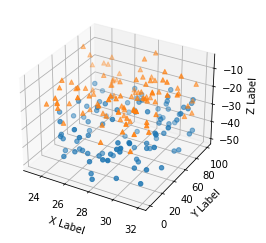

In [55]:
# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [58]:
xs.shape

(100,)

In [60]:
import plotly.express as px

# Data
x = ["A", "B", "C", "D", "E"]
y = ["W", "X", "Y", "Z"]
z = [[0, 1, 2, 3, 4],
     [4, 3, 2, 1, 0],
     [3, 2, 1, 0, 4],
     [1, 2, 3, 4, 0]]

# Create figure
fig = px.bar_3d(x=x, y=y, z=z)

# Show figure
fig.show()

AttributeError: module 'plotly.express' has no attribute 'bar_3d'

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [78]:
# @njit
# def manhattan_distance(coor1, coor2):
#     return sum([abs(coor1[i] - coor2[i]) for i in range(len(coor1))])

@njit
def e_dist(coor1, coor2):
    return sum([(coor1[i] - coor2[i]) ** 2 for i in range(len(coor1))]) ** 0.5


In [91]:
size = 1000000000
c1 = np.random.randn(size) * 100
c2 = np.random.randn(size) * 100

In [92]:
np.linalg.norm(c1 - c2)

4471979.733124693

In [93]:
e_dist(c1, c2)


4471979.733124803

In [106]:
import heapq

In [107]:
h = []
heapq.heappush(h, (5, 'write code'))
heapq.heappush(h, (7, 'release product'))
heapq.heappush(h, (1, 'write spec'))
heapq.heappush(h, (3, 'create tests'))
heapq.heappop(h)

(1, 'write spec')

In [110]:
heapq.heappop(h)

(7, 'release product')

In [111]:
from collections import defaultdict
d = defaultdict(lambda : 0)

d['a'] = 1

In [113]:
d['a']

1

In [115]:
arr = [3,6,1,67,23,7,89,21]
np.argmin([3,6,1,67,23,7,89,21])

2

In [116]:
s = set([1,2,3,4])


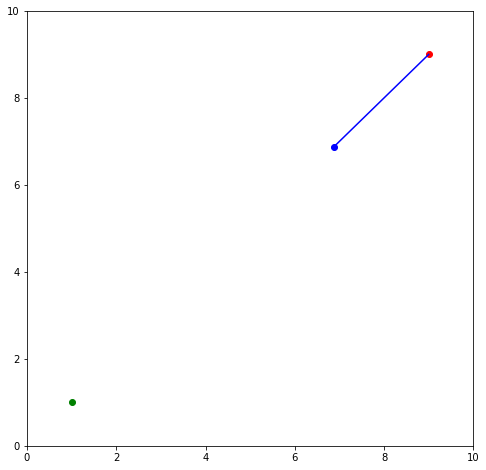

In [132]:
m = np.zeros((10,10))
a = np.array([9, 9])
b = np.array([1, 1])
max_radius = 3

direction = b - a
length = np.linalg.norm(direction)
offset = direction / length * min(length, max_radius)
c = np.array([a[0] + offset[0], a[1] + offset[1]])

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(a[0], a[1], c='r')
ax.scatter(b[0], b[1], c='g')
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.scatter(c[0], c[1], c='b')
ax.plot([a[0], c[0]], [a[1], c[1]], c='b')


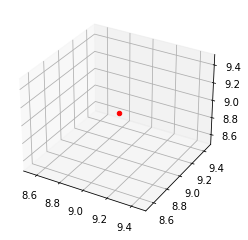

In [134]:
m = np.zeros((10,10,10))
a = np.array([9, 9, 9])
b = np.array([1, 1, 1])
max_radius = 3

direction = b - a
length = np.linalg.norm(direction)
offset = direction / length * min(length, max_radius)
c = np.array([a[0] + offset[0], a[1] + offset[1], a[2] + offset[2]])

ax = plt.axes(projection='3d')
ax.scatter3D(a[0], a[1], a[2], c='r')

# fig, ax = plt.subplots(figsize=(8, 8))
# ax.scatter(a[0], a[1], c='r')
# ax.scatter(b[0], b[1], c='g')
# ax.set_xlim([0, 10])
# ax.set_ylim([0, 10])
# ax.scatter(c[0], c[1], c='b')
# ax.plot([a[0], c[0]], [a[1], c[1]], c='b')


In [4]:
class A:
    def __init__(self):
        self.n_step = 0


    def h(self):
        for self.n_step in range(10):
            pass

a = A()
a.h()
a.n_step


9